In [34]:
# Import libraries
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
import altair as alt
import seaborn as sns

In [35]:
# set seed
np.random.seed(1)

In [36]:
# Load dataset
country_data =pd.read_csv("country_data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [39]:
country_data_neumeric = country_data.drop(columns=["country"])
country_data_neumeric.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [40]:
sns.set(font_scale=1)

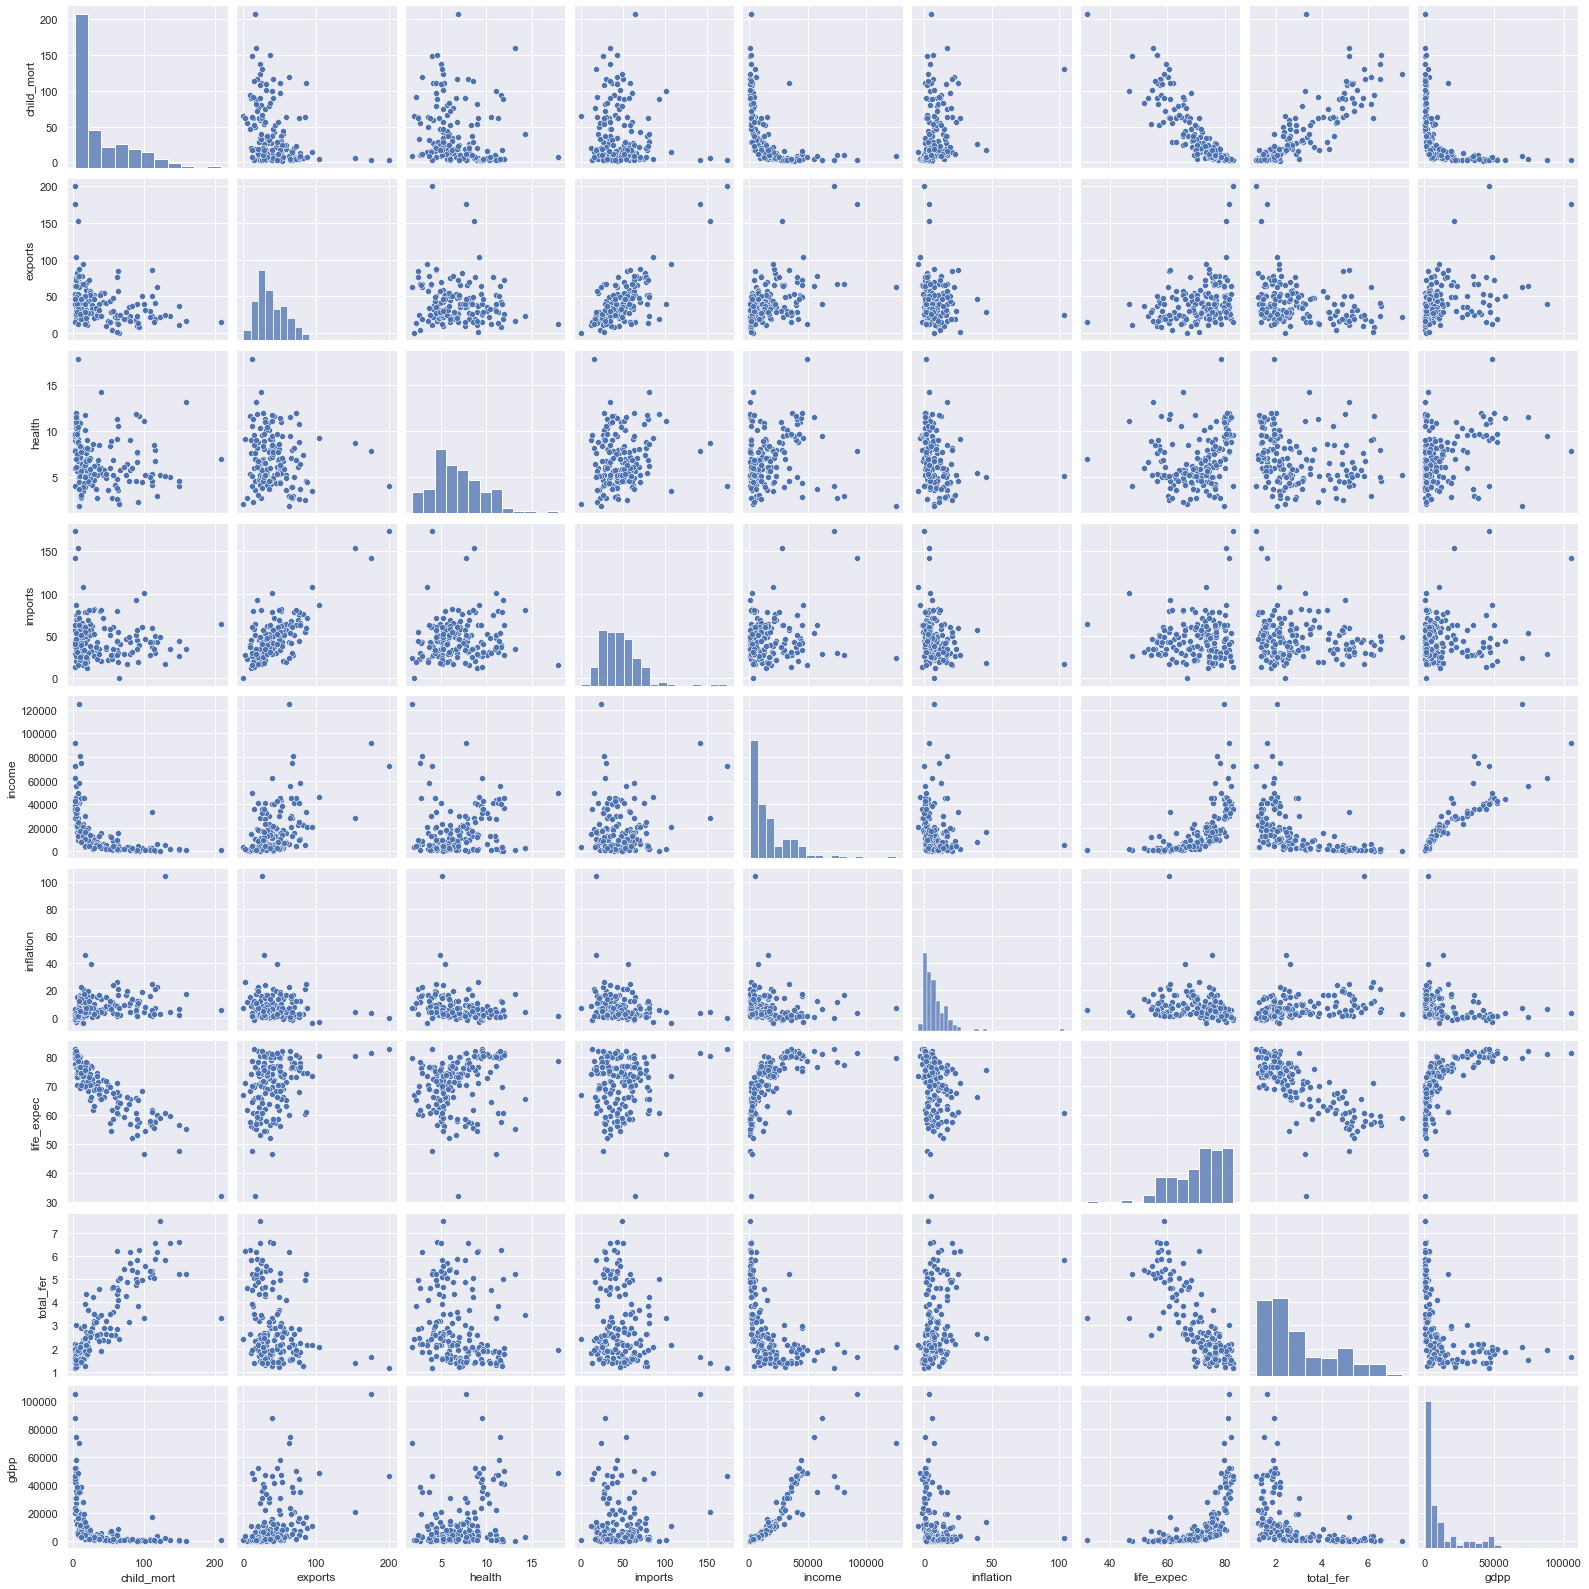

In [41]:
# Matrix plot for correlations between neumerical variables
sns.pairplot(country_data_neumeric)

In [5]:
scaler = StandardScaler()
standardized_data = pd.DataFrame(
    scaler.fit_transform(country_data_neumeric), columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'])
    
standardized_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [42]:
# Try 1 to 30 clusters
country_clust_ks = pd.DataFrame({"k": np.array(range(1, 31))})
country_clust_ks

,k
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [43]:
# Models for k_means algorithm on 1~30 clusters, run each of them 10 times
country_clust_ks = country_clust_ks.assign(
    country_clust = country_clust_ks['k'].apply(
        lambda x: KMeans(n_clusters=x, n_init=10, init="random").fit(standardized_data)
    )
)
country_clust_ks

,k,country_clust
0,1,"KMeans(init='random', n_clusters=1)"
1,2,"KMeans(init='random', n_clusters=2)"
2,3,"KMeans(init='random', n_clusters=3)"
3,4,"KMeans(init='random', n_clusters=4)"
4,5,"KMeans(init='random', n_clusters=5)"
5,6,"KMeans(init='random', n_clusters=6)"
6,7,"KMeans(init='random', n_clusters=7)"
7,8,KMeans(init='random')
8,9,"KMeans(init='random', n_clusters=9)"
9,10,"KMeans(init='random', n_clusters=10)"


In [44]:
# Compute the total squared distance from observations to centroid, and the number of iterations ran
country_clust_ks = country_clust_ks.assign(
    WSSD = country_clust_ks["country_clust"].apply(lambda x: x.inertia_),
    num_iteration = country_clust_ks["country_clust"].apply(lambda x: x.n_iter_)
)
country_clust_ks

,k,country_clust,WSSD,num_iteration
0,1,"KMeans(init='random', n_clusters=1)",1503.000000,2
1,2,"KMeans(init='random', n_clusters=2)",1050.214558,11
2,3,"KMeans(init='random', n_clusters=3)",831.424435,13
3,4,"KMeans(init='random', n_clusters=4)",700.322999,16
4,5,"KMeans(init='random', n_clusters=5)",631.665745,14
5,6,"KMeans(init='random', n_clusters=6)",552.182545,12
6,7,"KMeans(init='random', n_clusters=7)",519.400968,8
7,8,KMeans(init='random'),465.390660,10
8,9,"KMeans(init='random', n_clusters=9)",444.160640,10
9,10,"KMeans(init='random', n_clusters=10)",396.925275,13


In [45]:
# Drop the k_means models 
country_clust_ks = country_clust_ks.drop(columns = ["country_clust"])
country_clust_ks

,k,WSSD,num_iteration
0,1,1503.000000,2
1,2,1050.214558,11
2,3,831.424435,13
3,4,700.322999,16
4,5,631.665745,14
5,6,552.182545,12
6,7,519.400968,8
7,8,465.390660,10
8,9,444.160640,10
9,10,396.925275,13


In [46]:
# Elbow plot for finding best K

elbow_plot = (
    alt.Chart(country_clust_ks)
    .mark_line(point=True)
    .encode(
        x=alt.X("k", title="Number of clusters"),
        y=alt.Y("WSSD", title="within-cluster sum-of-squared-distances"),
    )
    .properties(width = 300, height = 500)
)
elbow_plot

alt.Chart(...)

It looks like 3 clusters would be a good choice. 

In [47]:
# Model for k_means using 3 clusters, run 10 times
country_data_clust = KMeans(n_clusters=3, n_init=10, init="random").fit(standardized_data)
country_data_clust

KMeans(init='random', n_clusters=3)

In [48]:
# Print WSSD, cluster centers, and number of iterations
print(f"WSSD : {country_data_clust.inertia_}")
print(f"Cluster Centers : {country_data_clust.cluster_centers_}")
print(f"Number of iterations : {country_data_clust.n_iter_}")

WSSD : 831.4244352086874
Cluster Centers : [[ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]]
Number of iterations : 6


In [49]:
# Predict the group of each country
predictions = country_data_clust.predict(standardized_data)
predictions

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [50]:
# Add the grouping results to original dataset
clustered_data = country_data.assign(cluster = predictions)
pd.set_option('display.max_rows',200)
clustered_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,1
